In [4]:
from pathlib       import Path
import sys

sys.path.append(str(Path("../").resolve()))

import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
from astropy.io           import fits

from config_loader        import ConfigLoader
from data_loader          import DataLoader

In [5]:
config = ConfigLoader(str(Path("../configs/config.yaml").resolve()))
data = DataLoader(config, verbosity = 0)

df_eROSITA = data.get_dataframe(config.EROSITA_PATH)
df_H20 = data.get_dataframe(config.H20_PATH)

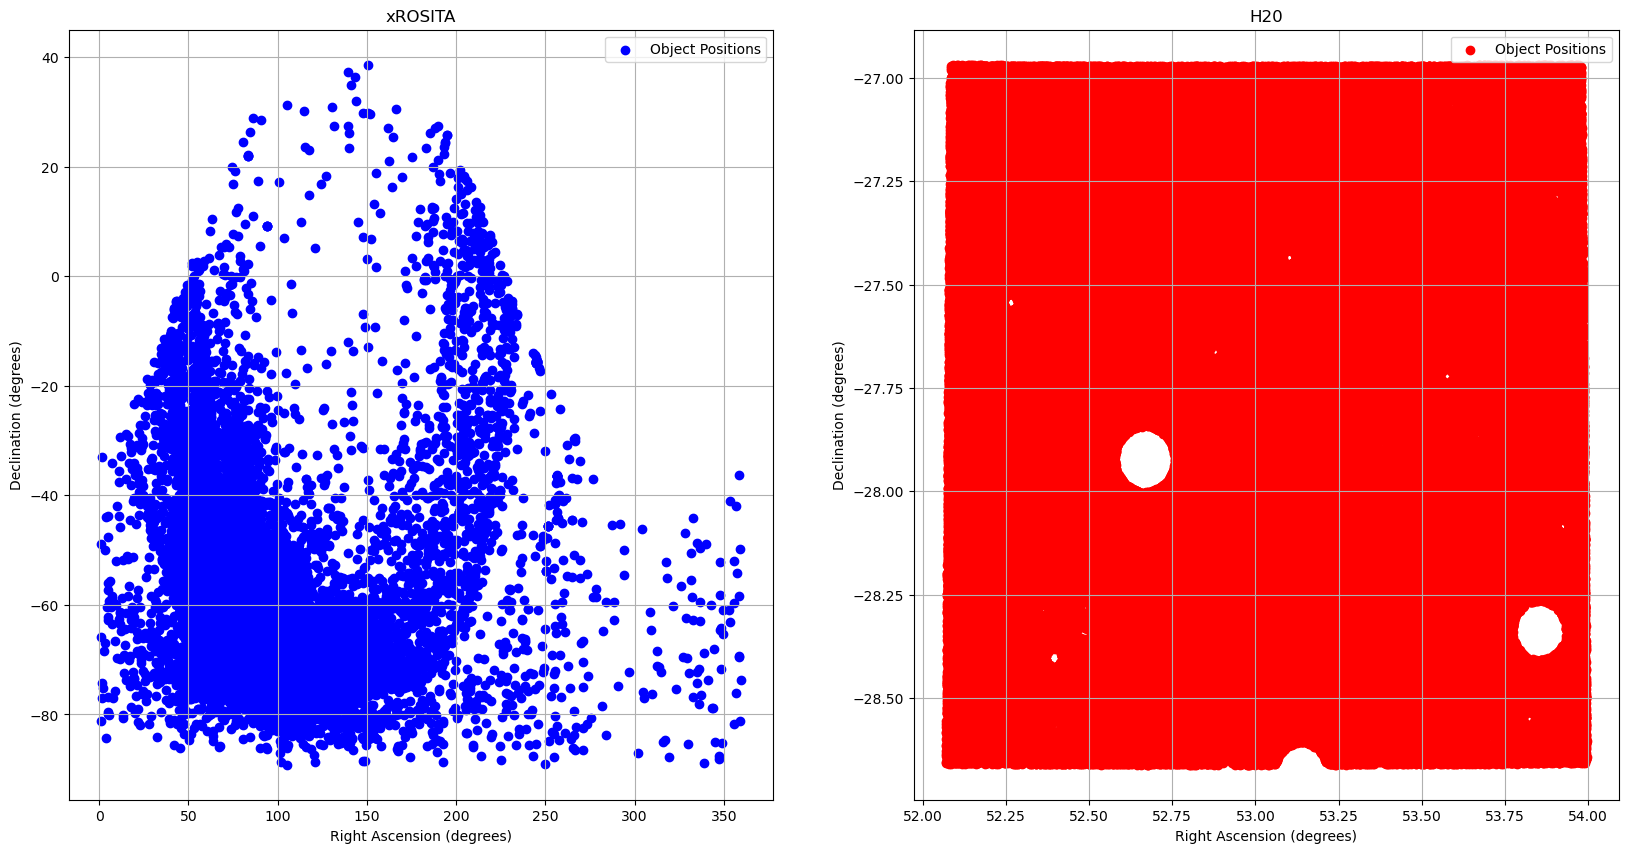

In [6]:

def clean_series(series):
    return series.replace([np.inf, -np.inf], np.nan).dropna()

df_eROSITA_clean = clean_series(df_eROSITA)
df_H20_clean = clean_series(df_H20)

df_eROSITA_RA, df_eROSITA_DEC = df_eROSITA_clean['RA_RAW'], df_eROSITA_clean['DEC_RAW']
df_H20_RA, df_H20_DEC = df_H20_clean['ALPHA_J2000'], df_H20_clean['DELTA_J2000']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.scatter(df_eROSITA_RA, df_eROSITA_DEC, c='blue', label='Object Positions')
ax1.set_title('xROSITA')
ax1.set_xlabel('Right Ascension (degrees)')
ax1.set_ylabel('Declination (degrees)')
ax1.grid(True)
ax1.legend()

ax2.scatter(df_H20_RA, df_H20_DEC, c='red', label='Object Positions')
ax2.set_title('H20')
ax2.set_xlabel('Right Ascension (degrees)')
ax2.set_ylabel('Declination (degrees)')
ax2.grid(True)
ax2.legend()

plt.show()

In [ ]:


        def surface_density(annulus_src_indices: pd.DataFrame) -> float32: 
            inner_radius = self.background_inner_rad
            outer_rad = self.background_outer_rad
            area = np.pi * ((outer_rad**2) - (inner_radius**2))
            
            min_flux = input_flux - self.acceptable_flux_range
            max_flux = input_flux + self.acceptable_flux_range
            
            total_background_flux: float32 = 0

            for index in annulus_src_indices:
                flux = self.__output_flux[index]
                if(min_flux < flux < max_flux):
                    total_background_flux += flux

            surface_density = total_background_flux / area
            return surface_density

        def total_proxmity_flux(proximity_src_indices: pd.DataFrame) -> float32:
            total_proxmity_flux: float32 = 0
            for index in proximity_src_indices:
                total_proxmity_flux += self.__output_flux[index]
            return total_proxmity_flux

        def real_flux_dist(
                num_sources: int32, 
                surface_density: float32, 
                total_proximity_flux:float32
        ) -> float32:
            num_sources = len(potential_match_indices)
            background = np.pi * (self.total_flux_rad**2) * num_sources * surface_density
            real_flux_dist = total_proxmity_flux - background
            return real_flux_dist
    
        def expected_flux_dist() -> float32:
            normalized_flux_dist = (
                real_flux_dist() / 
                np.sum([real_flux_dist for index in list])
            )
            expected_flux_dist = normalized_flux_dist * true_counterpart_frac()
            return expected_flux_dist

        def true_counterpart_frac() -> float32:
            num_potential_matches = len(potential_match_indices)
            num_sources = len(self.__output_uuid_arr)
            true_counterpart_frac = 1 - (num_potential_matches / num_sources)
            return true_counterpart_frac

        def probability_dist(index: int) -> float32:
            output_obj_err = self.__output_err[index]
            coefficient = 1 / (2 * np.pi * output_obj_err**2)
            exponent = np.exp(-distance**2 / (2 * output_obj_err**2))
            probability_dist = coefficient * exponent

            return probability_dist

        lr = probability_dist * expected_flux_dist / surface_density
    

